In [1]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
print(df.info())
print(df.head())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  

In [2]:
df = df.drop('CustomerID', axis=1)

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

print("Selected features shape:", X.shape)
print("First 5 rows of features:\n", X[:5])

Selected features shape: (200, 3)
First 5 rows of features:
 [[19 15 39]
 [21 15 81]
 [20 16  6]
 [23 16 77]
 [31 17 40]]


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled features shape:", X_scaled.shape)
print("First 5 rows of scaled features:\n", X_scaled[:5])

Scaled features shape: (200, 3)
First 5 rows of scaled features:
 [[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


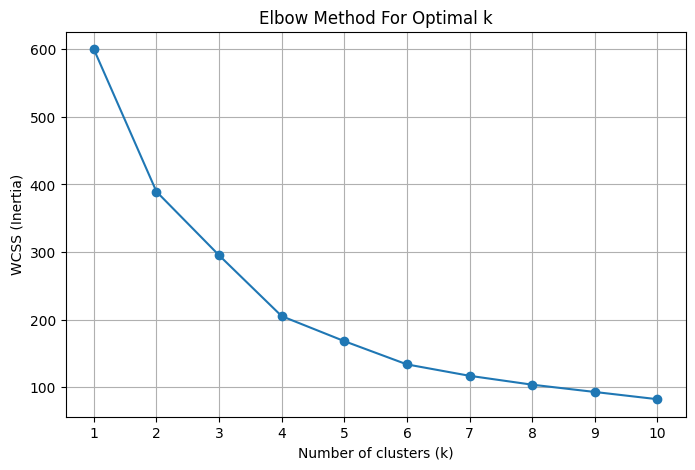

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(K_range)
plt.grid(True)
plt.savefig('elbow_method.png', bbox_inches='tight')
plt.show()

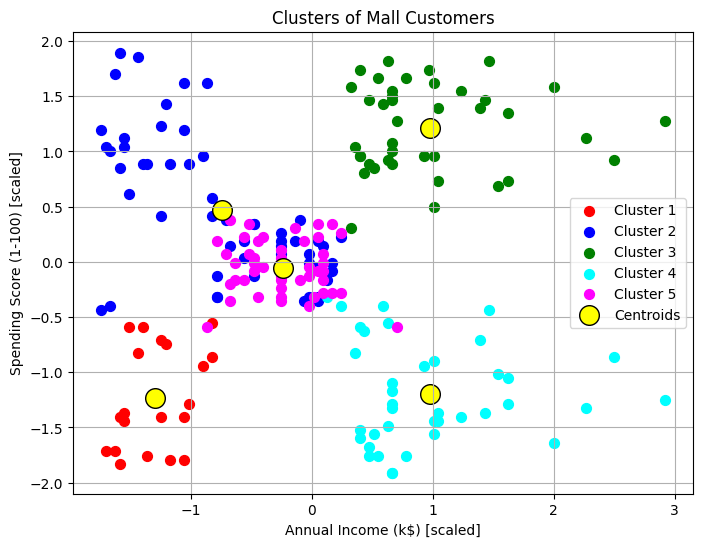

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[y_kmeans == 0, 1], X_scaled[y_kmeans == 0, 2], s=50, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 1], X_scaled[y_kmeans == 1, 2], s=50, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 1], X_scaled[y_kmeans == 2, 2], s=50, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 1], X_scaled[y_kmeans == 3, 2], s=50, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 1], X_scaled[y_kmeans == 4, 2], s=50, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='yellow', label='Centroids', edgecolors='black')

plt.title('Clusters of Mall Customers')
plt.xlabel('Annual Income (k$) [scaled]')
plt.ylabel('Spending Score (1-100) [scaled]')
plt.legend()
plt.grid(True)
plt.savefig('kmeans_clusters.png', bbox_inches='tight')
plt.show()

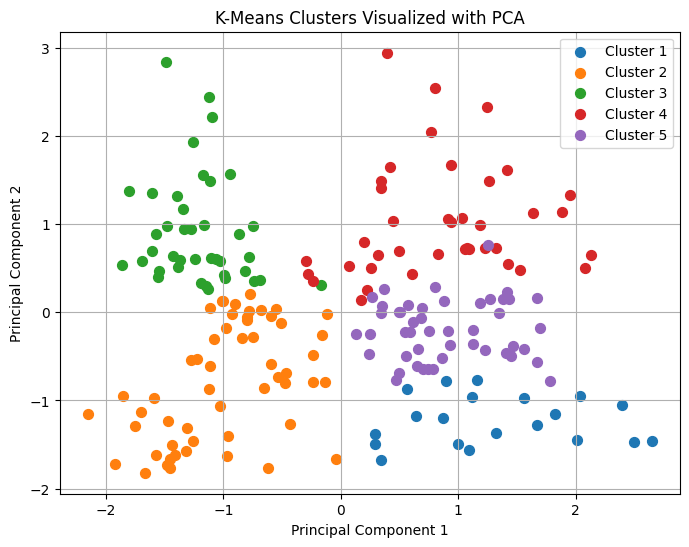

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for cluster in range(5):
    plt.scatter(
        X_pca[y_kmeans == cluster, 0],
        X_pca[y_kmeans == cluster, 1],
        label=f'Cluster {cluster+1}',
        s=50
    )

plt.title('K-Means Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.savefig('pca_clusters.png', bbox_inches='tight')
plt.show()

In [6]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, y_kmeans)
print("Silhouette Score for k=5:", score)

Silhouette Score for k=5: 0.41664341513732767
